In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [ ]:
# 딕셔너리, 딕셔너리 리스트 리마인드

In [33]:
# 1. "age"를 23으로 바꾸세요
# 2. "hobby" : "독서" 를 추가하세요
# 3. "city" key를 삭제하세요
# 4. "gender" key를 조회할 때 없으면 "unknown"을 반환하게 하세요

info = {"name": "영희", "age": 22, "city": "대전"}

info['age'] = 23
info['hobby'] = '독서'
info.pop('city')
info.get('gender', 'unknown')

# 모든 학생에 대해 "name"과 "평균 점수" 를 출력하시오. (단, 평균은 소수 둘째 자리까지 출력)

students = [
    {"name": "철수", "kor": 80, "eng": 90, "math": 70},
    {"name": "영희", "kor": 85, "eng": 95, "math": 80},
    {"name": "민수", "kor": 75, "eng": 85, "math": 90}
]

for student in students:
    mean = (student['kor'] + student['eng'] + student['math'])/3
    print('{}의 평균점수는 {}점'.format(student.get('name'),
                                             round(mean,2)))
    
# 국어 점수가 80점 이상인 학생의 이름만 리스트로 추출하시오.
# 풀이 1.
print('국어 점수가 80점 이상인 학생 :', end=' ')
for student in students:
    if student['kor'] >= 80:
        print(f"{student['name']}", end=' ')
print()
#풀이 2.
result = [student['name'] for student in students if student['kor'] >= 80 ]
print('국어 점수가 80점 이상인 학생 :', result)

철수의 평균점수는 80.0점
영희의 평균점수는 86.67점
민수의 평균점수는 83.33점
국어 점수가 80점 이상인 학생 : 철수 영희 
국어 점수가 80점 이상인 학생 : ['철수', '영희']


<b><font size="5" color="red">ch11_데이터프레임과 시리즈(Pandas)_1절~8절</font></b>

# 1절. 판다스 패키지
- pip install pandas / conda install pandas
- 데이터 분석을 위해 반드시 알아야할 패키지. 넘파이 기반으로 다른 많은 라이브러리와 잘 통합되도록 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임을 제공
- 판다스 장점 : 파일 io, 부분 데이터 추출, 크기변경, 데이터 분할, 병합, 정렬, 결측치 처리, 데이터분할, 피벗과 언피벗(와이드포맷과 롱모맷)에 용이

- [Pandas API referance](https://pandas.pydata.org/docs/reference/index.html)
- [Pandas Docs](https://pandas.pydata.org/docs/)

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [3]:
data = pd.read_csv('data/ch09_member4.csv', encoding='utf-8') # encoding='utf-8' 기본값
display(data)
type(data)

,name,age,email,address
0,홍길동,20,h@h.com,서울시 관악구
1,신길동,40,s@h.com,서울시 영등포구
2,김길동,30,k@h.com,서울시 동작구


pandas.core.frame.DataFrame

In [4]:
data = pd.read_csv('data/ch09_member1.csv',
                   header=None,
                   names=['name', 'age', 'email', 'address']         
                  )
data

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


In [44]:
data = pd.read_json('data/ch09_member.json')
data

,name,age,email,address
0,홍길동,20,h@h.com,서울시 관악구
1,신길동,40,s@h.com,서울시 영등포구
2,김길동,30,k@h.com,서울시 동작구


In [51]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key='iris')
iris.head()  # 상위 5개
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 2절. 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [52]:
d = {'kor' : [100, 90], 'mat' : [95, 99]}  # 딕셔너리를 데이터프레임으로

df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [53]:
df.to_dict()  # 데이터 프레임을 딕셔너리로 변환

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [54]:
df.to_numpy()

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [57]:
# 딕셔너리 리스트를 데이터프레임으로
d = [{'kor' : 100, 'math' : 95},  
    {'kor' : 90., 'math' : 99}]
df = pd.DataFrame(d)
df

,kor,math
0,100.0,95
1,90.0,99


In [60]:
df.dtypes

kor     float64
math      int64
dtype: object

In [61]:
df.info()  # 중요!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   math    2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [64]:
d = [{'kor' : 100, 'math' : 95},  
    {'kor' : 90, 'mathh' : 91},
    {'kor' : 93}]
df = pd.DataFrame(d)  # 결측치는 실수형이다. 정수형 변환불가(결측치 대체를 한 뒤 정수형 변환)
df

,kor,math,mathh
0,100,95.0,NaN
1,90,NaN,91.0
2,93,NaN,NaN


## 2.2 리스트를 이용해서 데이터 프레임 만들기

In [75]:
title = ['책1', '책2', '책3']
price = [ 15000, 18000, 20000]
df = pd.DataFrame(data={'title':title, 'price':price})
df

,title,price
0,책1,15000
1,책2,18000
2,책3,20000


In [73]:
l = [['책1', '책2', '책3'],
     [ 15000, 18000, 20000]]
l
import numpy as np
l_ = np.c_[l[0],l[1]]
l_

array([['책1', '15000'],
       ['책2', '18000'],
       ['책3', '20000']], dtype='<U11')

In [74]:
df = pd.DataFrame(l_, columns=['책이름', '가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,20000


## 2.3 read_csv

In [78]:
%ls C:\ai_x\download\shareData\상가정보_20250331

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\download\shareData\상가정보_20250331 디렉터리

2025-04-28  오후 03:49    <DIR>          .
2025-04-28  오후 03:49    <DIR>          ..
2025-04-21  오후 03:13             1,011 [필독]파일열람방법.txt
2025-04-21  오후 03:21        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-21  오후 03:21       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-21  오후 03:22        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-21  오후 03:22        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-21  오후 03:22        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-21  오후 03:22        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-21  오후 03:23        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-21  오후 03:23        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-21  오후 03:23       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-21  오후 03:23         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-21  오후 03:23        28,457,489 

In [80]:
df = pd.read_csv(r'C:\ai_x\download\shareData\상가정보_20250331\소상공인시장진흥공단_상가(상권)정보_세종_202503.csv',
                # encoding='utf-8',  
                # sep = ',',
                low_memory=False,
                nrows=30  # 처음 30행만                 
                )
df.shape

(30, 39)

### 2.3.0 판다스 디스플레이 옵션

In [84]:
pd.options.display.max_columns = 39 # 기본값 : 20. 39열까지 display 가능
pd.options.display.max_rows = 40 # 기본값 : 60. 40행까지 display 가능

In [85]:
df.head(1).T

,0
상가업소번호,MA010120220700019175
상호명,세종수이비인후과의원
지점명,NaN
상권업종대분류코드,Q1
상권업종대분류명,보건의료
상권업종중분류코드,Q102
상권업종중분류명,의원
상권업종소분류코드,Q10201
상권업종소분류명,내과/소아과 의원
표준산업분류코드,Q86201


### 2.3.1 CSV 파일 불러오기(기본값)

In [105]:

# encoding='utf-8', sep=',', 첫줄이 header, 두번째 줄부터 data
member = pd.read_csv('data/ch11_member.csv')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [106]:
# 형변환 age 열 : int63 -> int16
import numpy as np
member['Age'] = member['Age'].astype('int16') # 'int' : np.int32
member['Age'] 

0    20
1    30
2    21
3    22
4    23
5    24
Name: Age, dtype: int16

In [107]:
# 형변환 Birth 열 : object(문자) -> datetime64[ns] (최신버전)
member['Birth_as'] = member['Birth'].astype('datetime64')

In [109]:
member['Birth_to'] = pd.to_datetime(member['Birth']) # astype()함수보다 안전한 형변환

In [110]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
 6   Birth_to  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int16(1), object(4)
memory usage: 428.0+ bytes


### 2.3.2 특정행 제외하고 CSV 파일 읽기

In [6]:
# (2) 특정행 제외하고 CSV 파일 읽기
member = pd.read_csv('data/ch11_membercp949.csv', 
                    encoding='cp949',
                    skiprows=[1,6]  # skiprows=[idx1, idx2] idx1번째 행, idx2번째 행 제외하고 읽어오기
                    )
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


### 2.3.3 주석(#) 제외, datetime형 필드 지정하여 읽기

In [117]:
# (3) 주석(#) 제외, datetime형 필드 지정하여 읽기
member = pd.read_csv('data/ch11_member_tab.csv', 
                    sep='\t',
                    comment='#',
                    parse_dates=['Birth']) # datetime 형으로 읽어올 필드 지정, 시계열데이터 지정하는 것
member.info(), member

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


(None,
   Name  Age          Email  Address      Birth
 0  홍길동   20  hong@hong.com  서울시 강동구 1999-01-01
 1  홍길서   30   seo@hong.com   서울시 중구 1999-12-01
 2  홍길남   21   nam@hong.com  서울시 강동구 1999-11-01
 3  홍길북   22   buk@hong.com  서울시 관악구 1999-05-01
 4  홍길중   23   mid@hong.com   부산시 중구 1999-01-30)

In [123]:
# (4) sep='|', 상위 5행만 읽어오기
df = pd.read_csv('data/ch11_membersep.csv', 
                sep='|',
                nrows=2)  # nrows=2 <- 2번 행까지 가져온다 (헤더가 0행)
df

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01


## 2.4 패키지에서 가져오기 : iris데이터
- iris 가져오기 방법-1 : sklearn (머신러닝 패키지)  
- iris 가져오기 방법-2 : statsmodels (R 데이터)
- iris 가져오기 방법-3 : seaborn (시각화 패키지)  padas 데이터프레임
### 2.4.1 iris 가져오기 방법-1 : sklearn (머신러닝 패키지)
- 요약 : sklearn 패키지의 datasets 모듈 가져오기 -> load_iris() 
-   -> .feature_names는 열이름, .data는 독립변수, .target은 종속변수 -> 전처리 후 셋을 합쳐서 데이터프레임으로 만든다

In [103]:
from sklearn import datasets
# sklearn : 머신러닝을 위한 패키지(전처리 함수, 머신러닝, 성능평가를 위한 함수, 학습 데이터 셋 등이 대거 있음)
iris = datasets.load_iris()
iris.keys() # 딕셔너리 형태

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [104]:
# print(iris.DESCR)  # iris 데이터 셋에 대한 설명

In [108]:
iris.data # 독립변수
iris['data'][:3]
#iris.data[:3]  위와 결과는 같다

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [131]:
iris.feature_names
# iris['feature_names_mdfy'] = iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [109]:
# 데이터프레임에서 열이름
feature_names_mdfy = [ col[:-5].replace(' ', '_') for col in iris.feature_names] + ['specises']
feature_names_mdfy

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'specises']

In [ ]:
import seaborn as sns
sns.load_dataset

In [115]:
iris.target     # target 머신러닝시 종속 변수
#iris['target'] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [112]:
iris.target_names, iris.target_names[ iris.target ]

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

In [114]:
# 독립변수
data = iris.data
target = iris.target_names[ iris.target ]
data.shape, target.shape  # 150행으로 행 수 일치

((150, 4), (150,))

In [152]:
# 독립 변수와 종속변수를 stack 한 후
pd.DataFrame(data = np.hstack( (data, target[:,np.newaxis]) ),
            columns=feature_names_mdfy)

,sepal_length,sepal_width,petal_length,petal_width,specises
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2.4.2 iris 가져오기 방법-2 : statsmodels (R 데이터)

In [7]:
# R언어에 있는 유명한 데이터셋을 가져오는 함수
from statsmodels.datasets import get_rdataset
iris_dataset = get_rdataset('iris',
                           package='datasets',  # R의 datasets 패키지에서 가져옴, 안쓰면 이게 기본값이다
                           cache=True)  # 한번 다운로드 한 데이터셋을 PC에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [9]:
iris = iris_dataset.data  # iris_dataset의 데이터프레임이 .data 다/ R은 객체가 없어 .어쩌구가 가능. 파이썬에선 어색하지
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# iris['Sepal.Length']
# iris.Sepal.Length    # 파이썬에서는 에러가 날 수 밖에 없어. 열이름에 . 이 있으면 접근불가하니 조정하자
# iris.columns = [col.replace('.','_').lower() for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### 2.4.3 iris 가져오기 방법-3 : seaborn (시각화 패키지)

In [22]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# 데이터 프레임을 csv파일로 저장하기
iris.to_csv('data/ch11_iris.csv',
           sep=',',             # 기본값
           encoding='utf-8',    # 기본값
           index=False          # 인덱스(행이름)을 제외하고 파일 출력
           )           

In [25]:
import pandas as pd
load_iris = pd.read_csv('data/ch11_iris.csv')
load_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# 데이터 프레임을 압축파일(.zip, .gz, .bz2) 로 저장
iris.to_csv('data/ch11_iris.gz',
           index=False,
           compression='infer')

In [ ]:
load_iris = pd.read_csv('data/ch11_iris.gz', compression='infer') # compression='infer'

In [51]:
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
# 이 matrix에서 짝수만 골라서 1차원 리스트로 만들어라.
[x for data in matrix for x  in data  if x%2==0]

[2, 4, 6, 8]

# 3절. 이름(열, 행)지정하기
## 3.1 열이름지정하기

In [74]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [75]:
member.columns = ['이름', '나이', '메일', '주소', '생년월일']
member.columns.name = None
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정하기

In [45]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [50]:
member.index = range(11,16)
member.index

RangeIndex(start=11, stop=16, step=1)

In [48]:
member

,이름,나이,메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [76]:
member.index = ['동', '서', '남', '북', '중']
member.index.name = '방향'
member

,이름,나이,메일,주소,생년월일
방향,,,,,
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [53]:
member.loc['남', '이름'] # loc을 이용하여 행이름과 열이름으로 데이터 부분 조회

'홍길남'

In [59]:
# 특정열을 인덱스로 세팅
# member를 수정하려면 (1) 할당, (2) inplace 매개변수에 True(기본값은 False)
member1 = member.set_index('이름')  # 이름열이 index로 세팅, 단 결과 출력만 

In [63]:
member1.loc['홍길동']

나이                       20
메일            hong@hong.com
주소                  서울시 강동구
생년월일    1999-01-01 00:00:00
Name: 홍길동, dtype: object

In [66]:
member.set_index('이름', inplace=True) # 이름열이 index로 변경

In [68]:
member.head(1)

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [77]:
member.reset_index(inplace=True)  # 인덱스를 컬럼(열)로 
member

,방향,이름,나이,메일,주소,생년월일
0,동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [78]:
member = member.drop(columns=['방향'])
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [79]:
member.loc[1,'생년월일']

Timestamp('1999-12-01 00:00:00')

In [81]:
# 시리즈(날짜형).dt.year : datetime열의 year만 추출. .month, .day, .weekday
member['생년월일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생년월일, dtype: int64

In [82]:
member['생년월일'].dt.weekday  # 0 : 월, 1 : 화, 2 : 수, ... 5:토, 6:일

0    4
1    2
2    0
3    5
4    5
Name: 생년월일, dtype: int64

## 3.3 레벨 이름 지정하기(2차원)

In [85]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [89]:
member.columns = [['기본정보', '기본정보', '기본정보', '추가정보', '추가정보'],
                 ['이름', '나이', '메일', '주소', '생년월일']]
member.columns.names = ['대분류', '소분류']
member   # 자동으로 기본정보, 추가정보는 병합

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [126]:
member['기본정보']

소분류               이름  나이             메일
level_1 level_2                        
좌우      동        홍길동  20  hong@hong.com
        서        홍길서  30   seo@hong.com
상하      남        홍길남  21   nam@hong.com
        북        홍길북  22   buk@hong.com
        중        홍길중  23   mid@hong.com

In [118]:
member.index = [['좌우', '좌우', '상하', '상하', '상하'],
               ['동', '서', '남', '북', '중']]
member.index.names = ['level_1', 'level_2']
member

대분류             기본정보                        추가정보           
소분류               이름  나이             메일       주소       생년월일
level_1 level_2                                            
좌우      동        홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
        서        홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하      남        홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
        북        홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
        중        홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [120]:
member.loc[('좌우', '동'), '기본정보']

소분류
이름              홍길동
나이               20
메일    hong@hong.com
Name: (좌우, 동), dtype: object

# 4절. 부분데이터 조회
 - member['열이름'] 특정열
 - member[조건]
 - member.loc[행이름, 열이름:열이름]  *행이름, 열이름 쪽에 조건을 넣을 수도 있다
 - member.iloc[행번호, 열번호]

In [128]:
member = pd.read_csv('data/ch11_member.csv', comment='#',parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 열조회

In [156]:
member['Name'], "", type(member.Name)

(동    홍길동
 서    홍길서
 남    홍길남
 북    홍길북
 중    홍길중
 Name: Name, dtype: object,
 '',
 pandas.core.series.Series)

In [132]:
member[ ['Name', 'Email']]  # 복수개의 열을 가져올때는 대괄호[] 하나 더 넣어준다
# member[0]  오류난다. 왜? 열이름에 0은 없으니까. 행이름을 가져오려면 .loc / .iloc 함수를 써야한다. 열이름과 조건만 가능하다.

,Name,Email
0,홍길동,hong@hong.com
1,홍길서,seo@hong.com
2,홍길남,nam@hong.com
3,홍길북,buk@hong.com
4,홍길중,mid@hong.com


## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] : 행이름과 열이름으로 조회 (행번호 아니다)
    * 행이름과 열이름 자리에 list ex. ['Name', 'Email']
    * 행이름과 열이름 자리에 슬라이싱 from:to  : from부터 to(포함)까지   
        (cf) step 기능이 있으나, 잘 쓰진 않는다
    * , 열이름 생략시 모든 열 출력

In [135]:
# member의 0행부터 2행
member.loc[0:2]  # 2행 포함이다, 인덱스 숫자가 아니라 행이름이 숫자 2인것

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [136]:
# 비교해보자
member.index = ['동', '서', '남', '북', '중']
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [144]:
# member.loc['동':'남', ['Name':'Email', 'Birth']]  에러발생
member.loc['동':'남', ['Name', 'Birth']]
member.loc[['동','남'], ['Name','Email', 'Birth']]  # 슬라아싱이 아닌 복수개의 항목을 가져오려면 []를 친다, 단 []를 치면 슬라이싱안됨

,Name,Email,Birth
동,홍길동,hong@hong.com,1999-01-01
남,홍길남,nam@hong.com,1999-11-01


In [149]:
member.loc[:,['Name', 'Address']]  # == member['Name', 'Address']

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


In [157]:
member.loc['동'], type(member.loc['동'])  # 하나의 특정행이나 특정열만 access = > 결과가 시리즈

(Name                       홍길동
 Age                         20
 Email            hong@hong.com
 Address                서울시 강동구
 Birth      1999-01-01 00:00:00
 Name: 동, dtype: object,
 pandas.core.series.Series)

In [160]:
# 한줄만 2차원 데이터프레임으로 뽑으려면
member.loc['동':'동']  # 슬라이싱의 경우 결과가 2차원 =>데이터프레임

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [164]:
member[['Name']]

,Name
동,홍길동
서,홍길서
남,홍길남
북,홍길북
중,홍길중


## 4.3 iloc을 이용한 조회
- df.iloc[행번호, 열번호] : 행번호과 열번호으로 조회 
    * 행번호과 열번호 자리에 list ex. [0, 3]
    * 행번호과 열번호 자리에 슬라이싱 from:to:step  : from부터 to 앞까지 step씩 증감하며 (to미포함)
    * , 열번호 생략시 모든 열 출력 cf. 행번호는 그냥 생략 안되고 :, 를 넣는다

In [165]:
member.iloc[0:3] # 열번호 생략시 모든 열
# member.loc['동':'남'] 

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [171]:
member.iloc[0]  # 결과가 1차원이면 시리즈, 데이터프레임으로 하고자 하면 슬라이싱 이용하거나
                # pd.DataFrame() 함수 이용

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [173]:
# 짝수번째 행의 맨 마지막 열을 제외한 데이터 추출
member.iloc[::2,:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [188]:
# 모든 행의 마지막 열만 데이터프레임으로 추출
member.iloc[:,-1:]

,Birth
동,1999-01-01
서,1999-12-01
남,1999-11-01
북,1999-05-01
중,1999-01-30


In [189]:
# 0, 3 행 / 0, 3, 4
member.iloc[[0,3], [0,3,4]]  # == member.iloc[0:4:3, [0,3,4]] 

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
북,홍길북,서울시 관악구,1999-05-01


## 4.4 조건으로 조회하기
 - df.[조건] : 조건에 맞는 행(모든 열)
 - df.loc[조건, 열이름] 또는 df[조건][열이름] : 조건에 맞는 행의 특정 열

In [194]:
# Age가 22보다 큰 데이터 셋
member[member.Age>22]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [ ]:
# Age가 22보다 큰 데이터의 Name과 Age
member[member.Age>22][['Name','Age']]
# member[member.Age>22]['Name':'Email'] # 슬라이싱 안됨

In [206]:
member.loc[member.Age>22, ['Name','Age']  ]

,Name,Age
서,홍길서,30
중,홍길중,23


In [207]:
member.loc[member.Age>22, 'Name':'Age' ]

,Name,Age
서,홍길서,30
중,홍길중,23


### ※ 시리즈에 문자함수를 쓰기 위해 참조
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [219]:
# member.Address  얘는 시리즈 이고, startswith / count / find 얘네는 문자열에 대한 함수다
# 시리즈에 문자열 함수를 사용하려면, str을 쓰자
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [221]:
# 강동구 사는 사람 가져와 (아래 3가지 다 같은 결과 출력)
member[member.Address.str.count('강동구')>0]
member[member.Address.str.find('강동구')!=-1]
member[member.Address.str.contains('강동구')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [223]:
# 강동구 사는 사람의 'Name', 'Age' 열 조회
member.loc[member.Address.str.contains('강동구'), 'Name':'Age' ]

,Name,Age
동,홍길동,20
남,홍길남,21


In [218]:
# 생일이 12월인 사람 가져와
member[member.Birth.dt.month==12]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01


## 4.5 4절 연습문제

In [225]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [279]:
# 1. sepal_length 열만 출력
pd.DataFrame(iris['sepal_length'])

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [270]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.iloc[:11, :-1]
iris.loc[0:10, 'sepal_length':'petal_width']

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [232]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.iloc[3:11, [0,2]]
iris.loc[3:11, ['sepal_length','petal_length']]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [272]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.iloc[[0,50,100]]
iris.iloc[0:101:50]
iris.loc[[:100:50]] # 비추
iris.loc[[0,50,100]] # 비추

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [276]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.iloc[:126:25, -3:-1]
iris.loc[[0,25,50,75,100,125],['petal_length','petal_width']]
iris.loc[:125:25,['petal_length','petal_width']]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [237]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris.species=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [251]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris.species=='setosa'][0:6]
iris[iris.species=='setosa'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [252]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris.sepal_length>=6.5][0:6]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [280]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris.sepal_length>=7.2, ['sepal_length','sepal_width','petal_length']]
iris[iris.sepal_length>=7.2][['sepal_length','sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [288]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris.species =='versicolor') & 
     (iris.sepal_length>=6.5)]
# iris[iris.species =='versicolor'][iris.sepal_length>=6.5]  # 워닝은 뜨지만 값은 잘 출력됨. 리인덱싱

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [282]:
# 조건이 2개 일때 지원해주는 함수가 있다
import numpy as np
np.logical_and(True, True)
iris[ np.logical_and(iris.species =='versicolor', iris.sepal_length>=6.5) ]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [286]:
np.logical_and(True, True)

True

# 5절. 데이터 추가 및 삭제
## 5.1 데이터 프레임의 요소 삭제
- df.drop(label, axis) : axis=0 행삭제 / axis=1 열삭제 / label(열이름 or 행이름)

In [325]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동', '서', '남', '북', '중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [300]:
# (1) 단일 행 삭제
member.drop('북') # axis=0 기본값, 결과 출력, 실제 데이터프레임은 바뀌지 않음
# member.drop('북', inplace=True)  # 실제 반영됨
member1 = member.drop('북')
member1

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [303]:
# (2) 복수 행 삭제
member.drop(labels=['동', '서'], axis=0)

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [298]:
# (3) 열삭제
member.drop(labels=['Age', 'Birth'], axis=1)

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
서,홍길서,seo@hong.com,서울시 중구
남,홍길남,nam@hong.com,서울시 강동구
북,홍길북,buk@hong.com,서울시 관악구
중,홍길중,mid@hong.com,부산시 중구


## 5.2 데이터 프레임의 요소 추가

In [307]:
# 데이터 프레임에 열 추가 1 - 공통된 값으로 추가
member['favorit_no'] = 7
member

,Name,Age,Email,Address,Birth,favorit_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [326]:
# 데이터 프레임에 열 추가 2 - 리스트로 추가
member['fn'] = [ 7, 7, 7, None,10]   # 결측치 : None, np.nan, math.nan / 앞에 두개를 훨씬 더 많이 쓴다
member

,Name,Age,Email,Address,Birth,fn
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,10.0


In [308]:
import math
np.nan, None, math.nan  #결측치
# 결측치는 정수형 변환 불가 (결측치 대체 후 형변환)
# member['fn'].astype('int')

(nan, None, nan)

In [ ]:
# 데이터 프레임에 열 추가 3 - 시리즈로 추가 (내가 원하는 중 몇개는 넣고, 나머지는 결측치로 )

In [328]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member['fn2'] = pd.Series([7,7,7]) # index옵션을 사용하지 않으면 기본 숫자로 들어감.
member

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [322]:
pd.Series([7,7,7], index=[0, 3, 4])  # ['name', 'Age', 'No'] 와 같이 사용도 가능하다

0    7
3    7
4    7
dtype: int64

In [323]:
# 행추가 1 : 추가할 데이터를 데이터프레임 -> 기존 DF, 추가할 DF 연결
member = pd.read_csv('data/ch11_member.csv', comment='#')
new_member = pd.DataFrame([{
    'Name' : '홍길숙',
    'Age' : 30,
    'Email' : 'h@h.com',
    'Address' : '서울시 강서구',
    'Birth' : '2010-01-01'    
}])
new_member

,Name,Age,Email,Address,Birth
0,홍길숙,30,h@h.com,서울시 강서구,2010-01-01


In [339]:
# 행추가시 member와 new_member 연결
# member.append(new_member)    # 작동은 하지만 미래에 없어질거라고 concat 함수를 쓰라고 경고가 뜬다
# FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 
#    Use pandas.concat instead. 
member = pd.concat([member, new_member])  # axis=0(행추가)이 기본값, 열추가는 axis=1 
display(member)                                    
pd.concat([member, new_member], axis=1)   # axis=1로 열을 연결할때 행의 개수가 맞지 않다면 결측치가 생기며 엉망이 된다

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN
5,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN
0,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN


,Name,Age,Email,Address,Birth,fn2,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0,홍길숙,30.0,h@h.com,서울시 강서구,2010-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0,NaN,NaN,NaN,NaN,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0,NaN,NaN,NaN,NaN,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN,NaN,NaN,NaN,NaN,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN,NaN,NaN,NaN,NaN,NaN
5,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
0,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN,홍길숙,30.0,h@h.com,서울시 강서구,2010-01-01


In [341]:
# concat을 한 뒤에는 인덱스 재조정을 해야한다
# member.index = range(len(member))
member.reset_index()  # 기존 인덱스를 컬럼에 편입시키고 새로운 연속된 인덱스를 생성
member.reset_index(drop=True, inplace=True)  
# drop=True 하면, 기존 인덱스를 삭제하고 새로운 연속된 인덱스로 재조정
# inplace=True 하면, member를 실질 변경

In [338]:
member = member.drop(6)
member

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN
5,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN


In [ ]:
# 행추가 2 : 추가할 데이터를 시리즈로 만들어서 추가

# 6절. 병합과 연결
## 6.1 merge()를 이용한 병합

In [343]:
df1 = pd.DataFrame({'key' : ['a', 'b', 'c', 'd'],
                    'c1' : [1, 2, 3, 4] })
df2 = pd.DataFrame({'key' : ['a', 'b', 'c', 'e'],
                    'c2' : [5,6,7,8] })
display(df1, df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [352]:
# merge()를 이용한 병합
print("how = 'inner'")
display( df1.merge(right=df2) )  # how = 'inner'(기본값)  양쪽 다 일치하는 데이터만 남김
print("how = 'left'")
display( df1.merge(right=df2, how = 'left') )  # how = 'left' 왼쪽 데이터 기준으로, 오른쪽은 겹치는 것만 남김, 없는 값은 결측치로
print("how = 'right'")
display( df1.merge(right=df2, how = 'right') )  # how = 'right' 오른쪽 데이터 기준으로, 왼쪽은 겹치는 것만 남김, 없는 값은 결측치로
print("how = 'outer'")
display( df1.merge(right=df2, how = 'outer') )  # how = 'outer' 양쪽 모두 넣고, 없는 값은 결측치로

how = 'inner'


,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


how = 'left'


,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


how = 'right'


,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,e,NaN,8


how = 'outer'


,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,e,NaN,8.0


In [354]:
df3 = pd.DataFrame({'key3' : ['a', 'b', 'c', 'd'],
                    'c1' : [1, 2, 3, 4] })
df4 = pd.DataFrame({'key4' : ['a', 'b', 'c', 'e'],
                    'c2' : [5,6,7,8] })
display(df3, df4)
# 공통된 속성이 없을 때 key3 <> key4
# df3.merge(df4)  에러 발생

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [356]:
# 왼쪽 오른쪽의 키를 맞춰준다, 이전 과는 달리 불안정한 느낌이 있다.
df3.merge(right=df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,c,7.0
3,d,4.0,NaN,NaN
4,NaN,NaN,e,8.0


In [358]:
df3.merge(df4, left_index=True, right_index=True)  #pd.concat([df3,df4],axis=1)과 유사

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


## 6.2 concat()을 이용한 연결
- pd.concat( [ df1, df2 ], axis)
    * axis=0(기본값) : 위아래로 연결
    * axis=1 : 좌우로 연결

In [361]:
# 위아래 연결
df1 = pd.DataFrame({'key' : ['a', 'b', 'c', 'd'],
                    'c1' : [1, 2, 3, 4] })
df2 = pd.DataFrame({'key' : ['a', 'b', 'c', 'e'],
                    'c1' : [5,6,7,8] })
pd.concat( [df1, df2], axis=0 ).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [362]:
# 좌우로 연결
df3 = pd.DataFrame({'key' : ['a', 'b', 'c', 'd'],
                    'c1' : [1, 2, 3, 4] })
df4 = pd.DataFrame({'key' : ['a', 'b', 'c', 'e'],
                    'c1' : [5,6,7,8] })
pd.concat( [df3, df4], axis=1 )

,key,c1,key,c1
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


# 7절. 정렬(행이름, 열이름, 값에 의한 정렬)
- '100' < '9'
- df.sort_index(axis) : 행(axis=0) 또는 열(axis=1) 이름으로 정렬
- df.sort_values(by = 정렬기준이 될 열이름, acending=T/F, inplace=T/F)
## 7.1 행 이름으로 정렬

In [371]:
# 행(axis=0) 기준으로 내림차순 정렬
member.sort_index(axis=0, ascending=False)

# 행(axis=0 == axis='rows') 기준으로 오름차순(기본값) 정렬
member.sort_index(axis='rows')

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN
5,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN
6,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN


## 7.2 열 이름으로 정렬

In [377]:
member.sort_index(axis=1)  
member.sort_index(axis='columns')  

,Address,Age,Birth,Email,Name,fn2
0,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동,7.0
1,서울시 중구,30,1999-12-01,seo@hong.com,홍길서,7.0
2,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남,7.0
3,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북,NaN
4,부산시 중구,23,1999-01-30,mid@hong.com,홍길중,NaN
5,서울시 강서구,30,2010-01-01,h@h.com,홍길숙,NaN
6,서울시 강서구,30,2010-01-01,h@h.com,홍길숙,NaN


## 7.3 값에 의한 정렬

In [384]:
# 정렬을 시킬 값 기준이 여러 개일 수 있다
# Age 가 같으면 Birth를 기준으로 정렬해. 
member.sort_values(by = ['Age', 'Birth'], 
                   ascending=[False,True], # Age는 내림차순, Birth는 오름차순으로 정렬해
                   inplace=True)           # member에 내용 반영해
member

,Name,Age,Email,Address,Birth,fn2
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
5,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN
6,홍길숙,30,h@h.com,서울시 강서구,2010-01-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0


In [ ]:
# iris 데이터 셋

In [385]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [388]:
# (1) sepal_length 값 기준, 같으면 sepal_width 기준, 내림차순 정렬 적용
iris.sort_values(by=['sepal_length','sepal_width'], ascending=False, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


In [389]:
# (2) index(행이름) 기준 정렬 적용, 오름차순
iris.sort_index(axis=0, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [391]:
# (3) column(열이름) 기준 정렬한 내용을 출력
iris.sort_index(axis=1)
iris.sort_index(axis='columns')

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica


# 8절. 기초 통계 분석
- pandas : 기초 통계 / statsmodels : 난이도 있는 통계
- 변수간 상관분석, 요인분석
- conut : NaN을 제외한 갯수
- min, max, sum
- cumsum : 누적 합
- cumprod : 누적 곱
- mean
- rolling(n).mean() : 데이터 변동(노이즈) 다소 있을 때, 추세(패턴)을 부드럽게 보고 싶을 때
- median : 중위수
- qunantile : 분위수 - 0사분위수(0%), 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%)
    * 이상치를 구할 때 사용   
    * max(Q4), Q3, Q2, Q1, min(Q0)
    * IQR = Q3-Q1
    * 이상치의 기준은 Q1-1.5*IQR ~ Q3+1.5*IQR 이 범위를 벗어나는 값
- describe : 요약 통계량 
- corr : 변수와 변수 간의 상관관계(계수)

In [4]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.', '_') for col in iris.columns]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 8.1 min, max, mean, std..

In [12]:
iris.min(axis=0) # 열별 최소값(문자필드는 코드값이 작은 것), axis=0 주의. 

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [15]:
iris.median(axis=0, numeric_only=True) # 행들의 중위수(열별 중위수)
# 평균, 중위수, 표준편차, 분산 .... 숫자필드
# numeric_only=True : numeric만 적용 

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [18]:
# 매번 numeric_only=True 하긴 어려우니 문자열이 있는 종 열을 빼버리자
X = iris.iloc[:,:-1]    # 본래 변수에 대문자를 쓰지 않는데, 변수 여러개를 묶어서 선언할때는 대문자를 쓴다
X.sample()  # 랜덤하게 샘플을 가져온다

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4


In [20]:
X.std(axis = 0)
X.std(axis = 'index')

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [21]:
X.std(axis = 1)    # 행별 평균
X.std(axis = 'columns')

0      2.179449
1      2.036950
2      1.997498
3      1.912241
4      2.156386
         ...   
145    2.021551
146    2.075853
147    2.046745
148    1.791415
149    1.884144
Length: 150, dtype: float64

In [22]:
X.quantile()  # 기본값

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

In [27]:
# 각 분위수와 평균값을 구해보자
# quantile : 데이터프레임이나 시리즈에서 사분위수를 구하는 함수
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 데이터 출력
df = pd.DataFrame(data=[1,2,4,7,10])
df.columns = ['value'] 
df['value'].quantile(q=[0,0.25,0.5,0.75,1.], interpolation='nearest')

0.00     1
0.25     2
0.50     4
0.75     7
1.00    10
Name: value, dtype: int64

In [28]:
# interpolation='midpoint' 정확한 구간을 출력
df['value'].quantile(q=[0,0.3,0.55,0.75,1.], interpolation='midpoint')

0.00     1.0
0.30     3.0
0.55     5.5
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [31]:
quant = X.quantile(q=[0,0.25,0.5,0.75,1])
quant

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [38]:
min_ = quant.iloc[0,0]
max_ = quant.iloc[4,0]
q1 =  quant.iloc[1,0]
q3 =  quant.iloc[3,0]
min_ < q1-1.5*(q3-q1), max_ > q3+1.5*(q3-q1)

(False, False)

In [40]:
X.shape, X.count(axis=0)  # 결측치를 제외한 데이터 갯수

((150, 4),
 sepal_length    150
 sepal_width     150
 petal_length    150
 petal_width     150
 dtype: int64)

In [45]:
# 이동합을 구하게 되면 첫 0~4행의 합이 첫 결과값이기 때문에 iloc을 통해 잘라내서 보여주는 것
# X.rolling(5).sum()
X.rolling(5).sum().iloc[4:]  

,sepal_length,sepal_width,petal_length,petal_width
4,24.3,16.4,7.0,1.0
5,24.6,16.8,7.3,1.2
6,24.3,17.2,7.3,1.3
7,24.6,17.4,7.5,1.3
8,24.4,17.2,7.4,1.3
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


## 8.2 요약 통계량

In [46]:
# 1) 기본 요약 통계량
iris.describe()  # 디폴트로 숫자열과 문자열이 있을 경우 문자열인 speices는 자동 탈락

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
# 문자열에서도 describe() 함수 사용은 가능 : 데이터갯수, 데이터종류(unique), 최빈데이터(top), 최빈데이터개수(freq)
iris['species'].describe()
# 한꺼번에도 사용가능하다

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [50]:
# 2) describe() 의 매개변수 중 include와 exclude 
df = pd.DataFrame(data={'a' : [1,2,3]*2,
                       'b' : [2., 1]*3,
                       'c' : ['aaa']*5+['bbb'],
                       'd' : [True, False]*3})
display(df)
df.info()

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [51]:
df.describe() # 숫자열만

,a,b
count,6.000000,6.000000
mean,2.000000,1.500000
std,0.894427,0.547723
min,1.000000,1.000000
25%,1.250000,1.000000
50%,2.000000,1.500000
75%,2.750000,2.000000
max,3.000000,2.000000


In [52]:
df.describe(include=['float64','bool']) 
# 단일 열만 하고 싶으면 include='float64' 이렇게 스칼라로 넣으면 된다

,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [53]:
df.describe(include='all') 

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [55]:
df.describe(exclude=object) # object 형인 컬럼만 제외하고 요약 통계량

,a,b,d
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,True
freq,NaN,NaN,3
mean,2.000000,1.500000,NaN
std,0.894427,0.547723,NaN
min,1.000000,1.000000,NaN
25%,1.250000,1.000000,NaN
50%,2.000000,1.500000,NaN
75%,2.750000,2.000000,NaN


In [56]:
df['c'].unique()  # 특정 컬럽의 고유 값들의 종류

array(['aaa', 'bbb'], dtype=object)

In [57]:
df['c'].value_counts() # 특정 컬럽의 고유 값들의 각 개수

aaa    5
bbb    1
Name: c, dtype: int64

## 8.3 공분산, 상관계수

In [60]:
X.cov()  # 공분산을 구함

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [61]:
# -1 <= 상관계수 <=1
X.corr()  

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


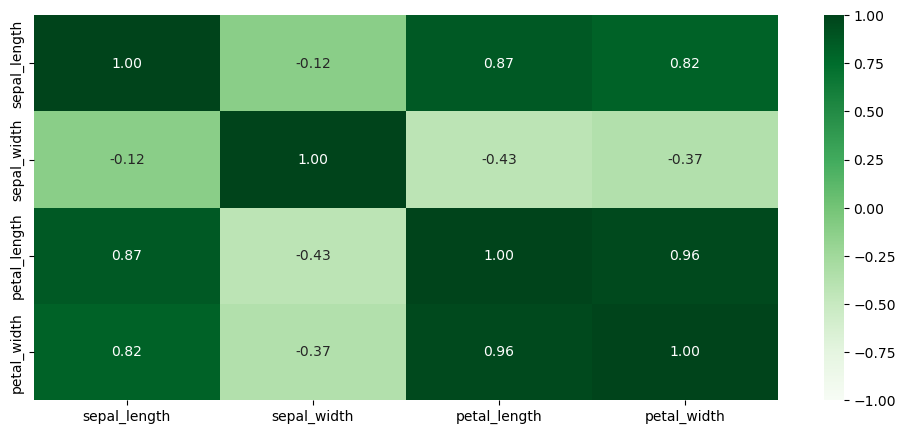

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))  # figsize는 튜플로, 그래프의 크기를 지정
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show()
